### Задача лабораторной работы - это првести *анализ рыночной корзины (Market Basket Analysis)*.  
*Анализ рыночной корзины* — процесс поиска наиболее типичных шаблонов покупок в супермаркетах. Он производится путем анализа баз данных транзакций с целью определения комбинаций товаров, связанных между собой. 

**Теоритечиские данные**  
Ассоциативные правила представляют собой механизм нахождения логических закономерностей между связанными элементами (событиями или объектами). Пусть имеется $\mathbf{A} = \{a_1, a_2, a_3, \dots, a_n\}$ - конечное множество уникальных элементов (list of items). Из этих компонентов может быть составлено множество наборов T (sets of items), т.е. $\mathbf{T} \subseteq \mathbf{A}$.  

Ассоциативные правила $\mathcal{A} \rightarrow \mathcal{T}$
имеют следующий вид: `если <условие> то <результат>`, где `<условие>` - а набор объектов из множества A, с которыми связаны (ассоциированы) объекты того же множества, включенные в `<результат>` данного правила.   

Поиск ассоциативных правил обычно выполняют в два этапа:

- в пуле имеющихся признаков $A$ находят наиболее часто встречающиеся комбинации элементов $T$;
- из этих найденных наиболее часто встречающихся наборов формируют ассоциативные правила.  

Для оценки полезности и продуктивности перебираемых правил используются различные частотные критерии, анализирующие встречаемость кандидата в массиве экспериментальных данных. Важнейшими из них являются поддержка (support) и достоверность (confidence). 

1. Правило $\mathcal{A} \rightarrow \mathcal{T}$ имеет поддержку $s$, если оно справедливо для $s%$ взятых в анализ случаев: $$\text{support}(\mathcal{A} \rightarrow \mathcal{T}) = P(\mathcal{A} \cup \mathcal{T})$$ 

2. Достоверность правила показывает, какова вероятность того, что из наличия в рассматриваемом случае условной части правила следует наличие заключительной его части (т.е. из $A$ следует $T$):
$$\text{confidence}(\mathcal{A} \rightarrow \mathcal{T}) = P(\mathcal{A} \cup \mathcal{T})/P(\mathcal{A}) = \text{support}(\mathcal{A} \rightarrow \mathcal{T})/\text{support}(\mathcal{A}).$$

Алгоритмы поиска ассоциативных правил отбирают тех кандидатов, у которых поддержка и достоверность выше некоторых наперед заданных порогов: `min_support` и `min_confidence`.   

Используются и другие показатели - лифт (lift), которая показывает, насколько повышается вероятность нахождения $T$
в анализируемом случае, если в нем уже имеется $A$:

$$\text{lift}(\mathcal{A} \rightarrow \mathcal{T}) = \text{confidence}(\mathcal{A} \rightarrow \mathcal{T}) / \text{support}(\mathcal{T})$$


**Начальные данные:** `Var_1_BreadBasket_DMS`  
Набор данных состоит из 21293 наблюдений из пекарни. Файл данных содержит четыре переменные: `Date`, `Time`, `Transaction ID` и `Item`. Идентификатор транзакции варьируется от 1 до 9684. 

# 1. Взяти файл з даними у вiдповiдностi з варiантом.

In [2]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Desktop/Var_1_BreadBasket_DMS.csv')
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


Построим диаграмму которая показывает 20 наиболее продаваемых товаров.

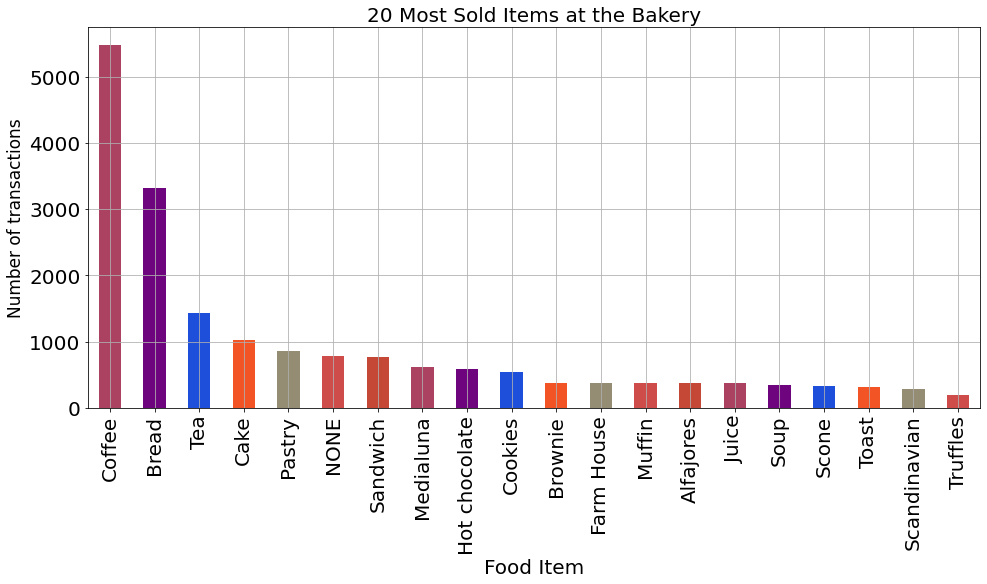

In [4]:
fig, ax=plt.subplots(figsize=(16,7))
color_rectangle = np.random.rand(7, 3)    # RGB
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5, color = color_rectangle, align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

# 2, 4.  Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori. 
Дослiдити множини АП залежно вiд параметрiв побудови АП:
- мiнiмальної пiдтримки,
- мiнiмальної достовiрностi,
- максимальної потужностi частих наборiв.  

Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до значущих АП. АП $R_k$ вважати значущим, якщо покращення (improvement або лiфт (lift)): $Improv(R_k) > 1.$

### Алгоритм Apriori
Простой алгоритм Apriori состоит из трех шагов:

1. **Объединение.** Просмотр базы данных и определение частоты вхождения отдельных товаров.
2. **Отсечение.** Те наборы, которые удовлетворяют поддержке и достоверности, переходят на следующую итерацию с двухкомпонентными наборами,
3. **Повторение.** Предыдущие два шага повторяются для каждой величины набора, пока не будет повторно получен ранее определенный размер. 

$L_k$ - множество k- элементных частых наборов).  
$C_k$ - множество кандидатов в k-элементные частые наборы, полученная путем связывания множества $L_{k-1}$ с собой.   

**Формальное определения алгоритма Apriori:** 
1. Построение множества одноэлементных частых наборов: $L_1 = ${$i | i ∈ I, Supp(i) ≥ Supp_{min}$};
2. Для всех $k = 2, ..., n$ генерируем k-элементные частые наборы $L_k =$
{$F ∪ $ {$i$} $| F ∈ L_{k-1}, i ∈ L_1 \ F, Supp (F ∪ ${ $i $}$) ≥ Supp_{min}$};
3. Если $L_k = ∅$, то выходим из цикла по k.    

На первом шаге берем одноэлементные частые наборы $L_1$. Далее добавляем к ним по одному
объекта, то есть формируем двухэлементные множества и так далее.Редкие наборы мы отвергаем и так постепенно наращиваем мощность наборов, фильтруя от нечастых наборов.  
Объем перебора существенно зависит от параметра $Supp_{min}$:
если значение $Supp_{min}$ уменьшаем, то количество частых наборов будет больше, если $Supp_{min}$ увеличиваем - то меньше. 
На втором шаге ищем частые наборы мощностью k, при условии, что частые наборы мощности k - 1 нам известны. 
Берем по одному элементу $F$ с $k - 1$ -елементного частого набора $L_{k-1}$, и по одному объекту i из множества $L_1$ без F и стараемся их объединить. Если $Supp(F ∪ ${$i$}$) ≥ Supp_{min}$, то записываем это объединение в $L_k$.  
На третьем шаге, если не нашли частого набора мощности k, то выходим из цикла по k, так как уже частого набора в дальнейшем не получим.

In [5]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

Приведем все данные к бинарному виду.

In [6]:
df_grouped = df.groupby(['Transaction','Item']).size().reset_index(name='count')

In [7]:
basket = (df_grouped.groupby(['Transaction', 'Item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Нормализованный вид базы данных транзакций. Количество столбцов в таблице равно количеству элементов, присутствующих во множестве транзакций. Каждая запись соответствует транзакции, где в соответствующем столбце стоит 1, если элемент присутствует в транзакции, и 0 — в противном случае. 

In [9]:
basket_sets = basket.applymap(encode_units)
basket_sets

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
30,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
19,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
25,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
17,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
22,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
27,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
7,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
29,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


### Варіювання параметрів алгоритму Apriori

Параметри:  
- min_support – минимальное пороговое значение поддержки *Supp*
- max_len – максимальная длина набора при поиске частых наборов (мощность)
- min_confidence – минимальное пороговое значение достоверность *Conf*

In [13]:
def variate_params(min_supports, max_lens, min_confidences):
    ms, ml, mc = [], [], []
    results, time_hist = [], []
    for sup in min_support:
        for leng in max_len:
            for conf in min_confidence:
                t = time.process_time()
                frequent_itemsets = apriori(basket_sets, min_support = sup, max_len = leng, use_colnames=True)
                rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
                fin_time = time.process_time() - t
                ms.append(sup)
                ml.append(leng)
                mc.append(conf)
                time_hist.append(fin_time)
                results.append(np.where(np.array(rules.lift) > 1, 1, 0).sum())
    return pd.DataFrame({"min_support": ms, "max_len": ml, "min_confidences": mc, "Num with lift>1": results, "time": time_hist})

In [14]:
min_support = [0.001, 0.005, 0.01]
max_len = [2, 3, 4]
min_confidence = [0.3, 0.4, 0.5]
variate_params(min_support, max_len, min_confidence).sort_values('min_support').style.hide_index()

min_support,max_len,min_confidences,Num with lift>1,time
0.001000,2,0.300000,336,0.207853
0.001000,2,0.400000,336,0.171289
0.001000,2,0.500000,336,0.181009
0.001000,3,0.300000,1152,0.683623
0.001000,3,0.400000,1152,0.653267
0.001000,3,0.500000,1152,0.655203
0.001000,4,0.300000,1230,1.028225
0.001000,4,0.400000,1230,1.019393
0.001000,4,0.500000,1230,1.033211
0.005000,4,0.500000,124,0.197777


Видно подтверждение *свойства антимонотонности*: с увеличением параметров $Supp_{min}$ и $Conf_{min}$ количество значимых АП уменьшается.  
Аналогичная ситуация наблюдается и со временем построения АП: чем больше найдено частых наборов, тем больше АП, а, следовательно, больше время их построения.
Параметр `max_len` влияет на количество найденных АП прямопропорционально, из-за чего увеличеваеться время работы.  
Так как высокое количество значимых правил не является мерой качества алгоритма с соответствующими параметрами, то выберем параметры, для которых время работы наименьшее (для последующих пунктов работы).
Итого значения:
- `min_support` = 0.01
- `min_confidences` = 0.3
- `max_len` = 2  

Time: 0.069097  
Количество найденных АП: 38

# 3, 4. Побудувати частi набори та множину АП, використовуючи алгоритм FP-росту.
Дослiдити множини АП залежно вiд параметрiв побудови АП:
- мiнiмальної пiдтримки,
- мiнiмальної достовiрностi,
- максимальної потужностi частих наборiв.  

Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до значущих АП. АП $R_k$ вважати значущим, якщо покращення (improvement або лiфт (lift)): $Improv(R_k) > 1.$

### Алгоритм FPG
В основе метода лежит предобработка базы транзакций, в процессе которой эта база данных преобразуется в компактную древовидную структуру, называемую `Frequent-Pattern Tree` – дерево популярных предметных наборов (откуда и название алгоритма).   
В дальнейшем для краткости будем называть эту структуру `FP-дерево G`. Его вершины - объекты $i ∈ I$, причем различные вершины деревья могут содержать одни и те же объекты. Путь от корня $g_0$ до вершины $g$ -
набор объектов $F ⊆ I$. $G(i) = {g ∈ G: g = i}$ - множество вершин для объекта $i$.
$Supp(i) = Σ_{g∈G(i)}Supp (g)$ - поддержка объекта $i$. Различные дерева соответствуют объектам по убыванию $Supp(i)$, причем $Supp(i) ≥ Supp_{min}$, то есть имеем порядок на множестве объектов.  
Алгоритм FPG состоит из двух этапов и одного предыдущего этапа.  
**Предварительный этап. Сортировка БД и создание словаря элементов**
Первый раз проходим БД транзакций и подсчитываем поддержку каждого объекта. Сортируем объекты по убыванию величины поддержки. Сортируем БД транзакций. Элементы отсортированного БД могут рассматриваться как слова или
словарь.   
**Этап 1. Построение FP-дерева**  
Дано $D = {T_1, ..., T_n}$ - множество транзакций (обучающая выборка).  
Необходимо найти дерево $G$ = {$g | g = (Name(g), Supp(g), Child(g))$}.  
Узел FP-дерева - это структура, которая сохраняет значение узла Name, значение его поддержки *Supp*, а также ссылки на все его дочерние элементы *Child*. Для каждого элемента каждой отсортированного транзакции из входного набора
строятся узлы по следующему правилу:

- если для очередного элемента в текущем узле есть наследник, содержащий этот элемент, то новый узел не создается, а поддержка этого потомка увеличивается на 1;
- в противном случае создается новый узел-потомок с поддержкой 1. Текущим узлом при этом становится найден или построен узел.  

**Этап 2. Поиск частых наборов в FP-дереве**  
Дано FP-дерево G, набор объектов F. Необходимо найти частые наборы для F.  
$F≔∅$  
Процедура $FP(G, F)$:  
1. $∀ i ∈ I: G(i) ≠ ∅$ по уровням снизу вверх. Если $Supp (i) ≥ Supp_{min}$, то  
 1.1.$F '≔ F ∪ {i}$ - частый набор;  
 1.2 Построить условное FP-дерево $G'$ по объекту i;  
 1.3. $FP (G', F')$ - найти частые наборы за деревом $G'$ для частого набора $F'$, в котором есть объект i.  

In [15]:
frequent_itemsets = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
38,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
15,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
9,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
31,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
21,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
16,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
29,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
23,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
37,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


### Варіювання параметрів алгоритму FPG

In [16]:
def variate_params_fpg(min_supports, max_lens, min_confidences):
    ms, ml, mc = [], [], []
    results, time_hist = [], []
    for sup in min_support:
        for leng in max_len:
            for conf in min_confidence:
                t = time.process_time()
                frequent_itemsets = fpgrowth(basket_sets, min_support = sup, max_len = leng, use_colnames=True)
                rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
                fin_time = time.process_time() - t
                ms.append(sup)
                ml.append(leng)
                mc.append(conf)
                time_hist.append(fin_time)
                results.append(np.where(np.array(rules.lift) > 1, 1, 0).sum())
    return pd.DataFrame({"min_support": ms, "max_len": ml, "min_confidences": mc, "Num with lift>1": results, "time": time_hist})

In [17]:
min_support = [0.001, 0.005, 0.01]
max_len = [2, 3, 4]
min_confidence = [0.3, 0.4, 0.5]
variate_params_fpg(min_support, max_len, min_confidence).sort_values('min_support').style.hide_index()

min_support,max_len,min_confidences,Num with lift>1,time
0.001000,2,0.300000,336,0.227843
0.001000,2,0.400000,336,0.308204
0.001000,2,0.500000,336,0.226361
0.001000,3,0.300000,1152,0.210308
0.001000,3,0.400000,1152,0.216047
0.001000,3,0.500000,1152,0.210440
0.001000,4,0.300000,1230,0.207268
0.001000,4,0.400000,1230,0.263382
0.001000,4,0.500000,1230,0.208783
0.005000,4,0.500000,124,0.170074


Аналогично алгоритму Apriori видно подтверждение *свойства антимонотонности*.  
Аналогичная ситуация наблюдается и со временем построения АП: чем больше найдено частых наборов, тем больше АП, а, следовательно, больше время их построения.
Параметр `max_len` влияет на количество найденных АП прямопропорционально, из-за чего увеличеваеться время работы.  
Так как высокое количество значимых правил не является мерой качества алгоритма с соответствующими параметрами, то выберем параметры, для которых время работы наименьшее (для последующих пунктов работы).
Итого значения:
- `min_support` = 0.01
- `min_confidences` = 0.3
- `max_len` = 4  

Time: 0.160564  
Количество найденных АП: 40 	

Но в целом значения времени стали меньше, поэтому можно сделать вывод, что алгоритм FPG лучше в плане скорости.

# 5. Знайти значення прогнозу на основi побудованої множини правил.

In [19]:
def get_recommendations(rules: pd.DataFrame, recommend_for: set):
    consequents = rules[rules.antecedents == frozenset(recommend_for)].drop(columns=["antecedents"]).sort_values("confidence", ascending=False).set_index("consequents")
    print(f"With this product people usually buy")
    display(consequents)

### Алгоритм Apriori

In [20]:
frequent_itemsets_apr = apriori(basket_sets, min_support = 0.01, max_len = 2, use_colnames=True)
rules_apr = association_rules(frequent_itemsets_apr, metric='lift', min_threshold=0.3)
get_recommendations(rules_apr, {"Cookies"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053
(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725


In [21]:
get_recommendations(rules_apr, {"Sandwich"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
(Bread),0.071346,0.324940,0.016892,0.236765,0.728642,-0.006291,0.884472
(Tea),0.071346,0.141643,0.014269,0.200000,1.412000,0.004164,1.072946


### Алгоритм FPG

In [22]:
frequent_itemsets_fpg = fpgrowth(basket_sets, min_support = 0.01, max_len = 5, use_colnames=True)
rules_fpg = association_rules(frequent_itemsets_fpg, metric='lift', min_threshold=0.3)
get_recommendations(rules_fpg, {"Tea"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.141643,0.475081,0.049523,0.349630,0.735936,-0.017769,0.807107
(Bread),0.141643,0.324940,0.027909,0.197037,0.606380,-0.018117,0.840712
(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235
(NONE),0.141643,0.079005,0.018256,0.128889,1.631394,0.007066,1.057264
(Sandwich),0.141643,0.071346,0.014269,0.100741,1.412000,0.004164,1.032688


In [23]:
get_recommendations(rules_fpg, {"Cake"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
(Bread),0.103137,0.324940,0.023187,0.224822,0.691888,-0.010326,0.870846
(Hot chocolate),0.103137,0.057916,0.011331,0.109868,1.897010,0.005358,1.058364


# 6. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.

Итак, в результате выполненных исследований, можно сделать вывод, что результаты, полученные с помощью использования обоих алгоритмов, являются идентичными.   
Однако отличаеться время для формирования частых наборов.  
Покажем это с помощью построения графика затраченного времени на построение АП для случайного подмножества данных.

In [24]:
def association_rules_time(dataset, ms, ml, mc, apr = True):
    t = time.process_time()
    if apr == True:
        frequent_itemsets = apriori(dataset, min_support=ms, max_len=ml, use_colnames=True)
    else:
        frequent_itemsets = fpgrowth(dataset, min_support=ms, use_colnames=True, max_len=ml)
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=mc)
    return time.process_time() - t

Text(0.5, 1.0, 'Time for fitting to training samples')

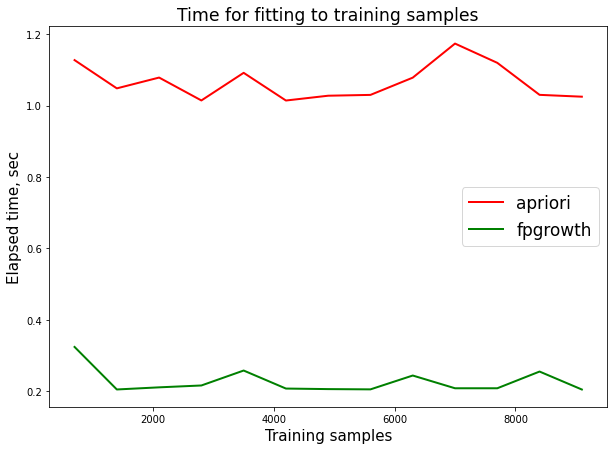

In [25]:
apriori_time, fpgrowth_time = [], []
some_samples = range(700, basket_sets.shape[0], 700)
for samples in some_samples:
    a_time = association_rules_time(dataset = basket_sets, ms=0.001, ml=4, mc=0.4)
    apriori_time.append(a_time)
    fp_time = association_rules_time(dataset = basket_sets, ms=0.001, ml=4, mc=0.4, apr=False)
    fpgrowth_time.append(fp_time)
    
plt.figure(figsize=(10, 7))
plt.plot(some_samples, np.array(apriori_time), c='r', label='apriori', linewidth=2)
plt.plot(some_samples, np.array(fpgrowth_time), c='g', label='fpgrowth', linewidth=2)
plt.legend(fontsize=17)
plt.xlabel('Training samples', fontsize=15)
plt.ylabel('Elapsed time, sec', fontsize=15)
plt.title('Time for fitting to training samples', size='xx-large')

Результат подтверждает: алгоритм `FPG` значительно быстрее алгоритма `Apriori`.

## Вывод
В процессе выполнения данного практикума я исследовала два алгоритма: Apriori и FP-Growth, которые используются для построения частых наборов товаров по заданным транзакциями, чтобы, использовав эти данные, построить ассоциативные правила, которые позволяют понять, какие товары покупаются вместе.  
В первую очередь это полезно маркетологам интернет-магазинов для принятия взвешенных решений, направленных на проработку сценариев взаимодействия с пользователями. Стоит также отметить, что такой анализ будет полезен интернет-магазинам, где в «чеке», как правило, не один товар, а набор различных товаров – например, любой продуктовый ритейл.  
Целью применения анализа рыночной корзины в розничной торговле обычно являются:

- создание бизнес-шаблонов покупок;
- оптимизация ассортимента товаров и их запасов;
- оптимизация размещения товаров на витринах и в торговых залах (чтобы товары из одного шаблона размещались рядом друг с другом);
- повышение эффективности маркетинговых компаний и промоакций (например, предлагать скидку на все товары из шаблонов);
- снижение стоимость рекламных компаний с целью сделать их более целенаправленными.

